# Libraries

In [ ]:
import pandas as pd # Needed For Various Python Built-in Functions
from sklearn.model_selection import train_test_split # Used to Split the dataset into train_dataset and test_dataset
from sklearn.preprocessing import StandardScaler # Needed to ensures that all of the features are given equal importance during modeling
from sklearn.naive_bayes import MultinomialNB # Naive Bayes Model
from sklearn.neighbors import KNeighborsClassifier # KNN Model
from sklearn.tree import DecisionTreeClassifier # Decision Tree Model
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # SVM Model
from sklearn.metrics import confusion_matrix # Used for model evaluation, that means in depth details of testing and generates accuracy for the model
from sklearn.calibration import calibration_curve # Used to Plot the Prediction Result of a binary classifier Trained Model
import seaborn as sns # Used to Plot the Heatmap of the Co-Relation Diagram
import matplotlib.pyplot as plt # Used to declare the the figure or frame size


# Load dataset

In [ ]:
from google.colab import files
df = files.upload()



# Data Pre-processing

## Dataset Shape

In [ ]:
df.shape

(2308, 21)

## Dataset Summary

In [ ]:
df.describe()

,Year,Rank,Score,Total,Score Percentage,Penalty
count,2308.000000,2265.000000,2275.000000,2308.000000,2275.000000,2190.000000
mean,2011.681976,53.217219,3.875604,11.132582,0.348523,655.082648
std,6.320118,33.887514,2.225798,1.608310,0.194726,391.896365
min,1999.000000,1.000000,0.000000,8.000000,0.000000,0.000000
25%,2007.000000,25.000000,2.000000,10.000000,0.200000,365.250000
50%,2012.000000,49.000000,4.000000,11.000000,0.330000,638.000000
75%,2017.000000,78.000000,5.000000,12.000000,0.500000,934.500000
max,2021.000000,139.000000,13.000000,15.000000,1.000000,1912.000000


## Total Null Values

In [ ]:
df.isnull().sum()

Year                   0
Date                   0
Host                   0
City                   0
Venue                  0
Rank                  43
University             0
Country                0
Team                   2
Contestant 1         400
Contestant 2         400
Contestant 3         401
Gold                   0
Silver                 0
Bronze                 0
Honorable              0
Score                 33
Total                  0
Score Percentage      33
Penalty              118
Prize               2168
dtype: int64

## All Data types

In [ ]:
df.dtypes

Year                  int64
Date                 object
Host                 object
City                 object
Venue                object
Rank                float64
University           object
Country              object
Team                 object
Contestant 1         object
Contestant 2         object
Contestant 3         object
Gold                   bool
Silver                 bool
Bronze                 bool
Honorable              bool
Score               float64
Total                 int64
Score Percentage    float64
Penalty             float64
Prize                object
dtype: object

## Show all the categorical attributes

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['Date',
 'Host',
 'City',
 'Venue',
 'University',
 'Country',
 'Team',
 'Contestant 1',
 'Contestant 2',
 'Contestant 3',
 'Prize']

## Dataset Glimpse

In [ ]:
df.head()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
0,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,1.0,University of Waterloo,Canada,U Waterloo,David Kennedy,...,Viet-Trung Luu,True,False,False,False,6.0,8,0.75,948.0,World Champion
1,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,2.0,Albert-Ludwigs-Universität Freiburg,Germany,Freiburg B Team,NaN,...,NaN,False,True,False,False,6.0,8,0.75,992.0,NaN
2,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,3.0,St. Petersburg Institute of Fine Mechanics & O...,Russia,St. Petersburg IFMO,Alexander Volkov,...,Vladimir Lyovkin,False,False,True,False,6.0,8,0.75,1046.0,NaN
3,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,4.0,University of Bucharest,Romania,UNIBUC Bucharest,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1048.0,NaN
4,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,5.0,Duke University,United States,Duke Blue Devils,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1337.0,NaN


## Rename Problematic Columns

In [ ]:
df = df.rename(columns={'Score Percentage': 'Score_Percentage'})

## Unique values

In [ ]:
for col in df.columns:
    print(f'Unique values for {col}:')
    print(df[col].unique())
    print('---')

Unique values for Year:
[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021]
---
Unique values for Date:
['1999-04-11' '2000-03-18' '2001-03-10' '2002-03-23' '2003-03-25'
 '2004-03-31' '2005-04-06' '2006-04-12' '2007-03-15' '2008-04-09'
 '2009-04-21' '2010-02-05' '2011-05-30' '2012-05-17' '2013-07-03'
 '2014-06-25' '2015-05-20' '2016-05-19' '2017-05-24' '2018-04-19'
 '2019-04-04' '2021-10-05' '2022-11-10']
---
Unique values for Host:
['Netherlands' 'United States' 'Canada' 'Czechia' 'China' 'Japan' 'Sweden'
 'Poland' 'Russia' 'Morocco' 'Thailand' 'Portugal' 'Bangladesh']
---
Unique values for City:
['Eindhoven' 'Orlando, FL' 'Vancouver, BC' 'Honolulu, HI'
 'Beverly Hills, CA' 'Prague' 'Shanghai' 'San Antonio, TX'
 'Urayasu, Chiba' 'Banff, AB' 'Stockholm' 'Harbin' 'Warsaw'
 'Saint Petersburg' 'Yekaterinburg' 'Marrakech' 'Phuket' 'Rapid City, SD'
 'Beijing' 'Porto' 'Moscow' 'Dhaka']
---
Unique values for Venue:
['Eindhoven 

## Mapping the categorical data to numarical

In [ ]:
df['Host'] = df['Host'].map({'Netherlands': 14, 'United States': 5, 'Canada' : 1, 'Czechia' : 23, 'China' : 8, 'Japan' : 13, 'Sweden' : 25, 'Poland' : 7, 'Russia' : 3, 'Morocco' : 21, 'Thailand' : 65, 'Portugal' : 73, 'Bangladesh' : 19})
df['Country'] = df['Country'].map({'Canada': 1, 'Germany': 2, 'Russia': 3, 'Romania': 4, 'United States': 5, 'Taiwan': 6, 'Poland': 7, 'China': 8, 'New Zealand': 9, 'Singapore': 10, 'Slovakia': 11, 'South Korea': 12, 'Japan': 13, 'Netherlands': 14, 'Australia': 15,
    'Belarus': 16, 'Brazil': 17, 'Argentina': 18, 'Bangladesh': 19, 'Mexico': 20, 'Morocco': 21,'Hong Kong': 22,'Czechia': 23,'Spain': 24,'Sweden': 25,'South Africa': 26,'Venezuela': 27,'North Macedonia': 28,'Iran': 29,
    'India': 30,'Egypt': 31,'Estonia': 32,'Bulgaria': 33,'France': 34,'Ukraine': 35,'Kyrgyzstan': 36,'Norway': 37,'Philippines': 38,'Colombia': 39,'Kazakhstan': 40,'Viet Nam': 41,'Austria': 42,'Indonesia': 43, 'Chile': 44, 'Croatia': 45,
    'Finland': 46,'United Kingdom': 47,'North Korea': 48, 'Georgia': 49, 'Cuba': 50,'Lebanon': 51,
    'Switzerland': 52,'Peru': 53, 'United Arab Emirates': 54, 'Bolivia': 55, 'Saudi Arabia': 56,'Latvia': 57,'Dominican Republic': 58,'Malaysia': 59, 'Lithuania': 60,'Syria': 61, 'Uzbekistan': 62,'Jordan': 63,'Denmark': 64,'Thailand': 65,
    'Armenia': 66,'Turkey': 67,'Pakistan': 68,'Italy': 69,'Costa Rica': 70,'Myanmar': 71,'Serbia': 72,'Portugal': 73,'Tunisia': 74,'Afghanistan': 75,'Ethiopia': 76,
})
df['Gold'] = df['Gold'].astype(int)
df['Silver'] = df['Silver'].astype(int)
df['Bronze'] = df['Bronze'].astype(int)
df['Honorable'] = df['Honorable'].astype(int)
df['Prize'] = df['Prize'].map({'World Champion': 1,'World Champion, Europe Champion': 2,'South Pacific Champion': 3,'North America Champion': 4,'Asia Champion': 5,'Latin America Champion': 6,'Africa and the Middle East Champion': 7,'World Champion, Asia Champion': 8,
                               'Europe Champion': 9,'World Champion, Northern Eurasia Champion': 10,'Asia East Champion': 11,'Asia Pacific Champion': 12,'Asia West Champion': 13,'World Champion, North America Champion': 14,'Northern Eurasia Champion': 15}).fillna(0)
df.head()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score_Percentage,Penalty,Prize
0,1999,1999-04-11,14,Eindhoven,Eindhoven University of Technology,1.0,University of Waterloo,1,U Waterloo,David Kennedy,...,Viet-Trung Luu,1,0,0,0,6.0,8,0.75,948.0,1.0
1,1999,1999-04-11,14,Eindhoven,Eindhoven University of Technology,2.0,Albert-Ludwigs-Universität Freiburg,2,Freiburg B Team,NaN,...,NaN,0,1,0,0,6.0,8,0.75,992.0,0.0
2,1999,1999-04-11,14,Eindhoven,Eindhoven University of Technology,3.0,St. Petersburg Institute of Fine Mechanics & O...,3,St. Petersburg IFMO,Alexander Volkov,...,Vladimir Lyovkin,0,0,1,0,6.0,8,0.75,1046.0,0.0
3,1999,1999-04-11,14,Eindhoven,Eindhoven University of Technology,4.0,University of Bucharest,4,UNIBUC Bucharest,NaN,...,NaN,0,0,1,0,6.0,8,0.75,1048.0,0.0
4,1999,1999-04-11,14,Eindhoven,Eindhoven University of Technology,5.0,Duke University,5,Duke Blue Devils,NaN,...,NaN,0,0,1,0,6.0,8,0.75,1337.0,0.0


In [ ]:
df.dtypes

Year                  int64
Date                 object
Host                  int64
City                 object
Venue                object
Rank                float64
University           object
Country               int64
Team                 object
Contestant 1         object
Contestant 2         object
Contestant 3         object
Gold                  int64
Silver                int64
Bronze                int64
Honorable             int64
Score               float64
Total                 int64
Score_Percentage    float64
Penalty             float64
Prize               float64
dtype: object

In [ ]:
df.isnull().sum()

Year                  0
Date                  0
Host                  0
City                  0
Venue                 0
Rank                 43
University            0
Country               0
Team                  2
Contestant 1        400
Contestant 2        400
Contestant 3        401
Gold                  0
Silver                0
Bronze                0
Honorable             0
Score                33
Total                 0
Score_Percentage     33
Penalty             118
Prize                 0
dtype: int64

## Fix Missing Values by using the previous values

In [ ]:
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

Year                0
Date                0
Host                0
City                0
Venue               0
Rank                0
University          0
Country             0
Team                0
Contestant 1        0
Contestant 2        0
Contestant 3        0
Gold                0
Silver              0
Bronze              0
Honorable           0
Score               0
Total               0
Score_Percentage    0
Penalty             0
Prize               0
dtype: int64

# Co-Relationship

## Pair Plot

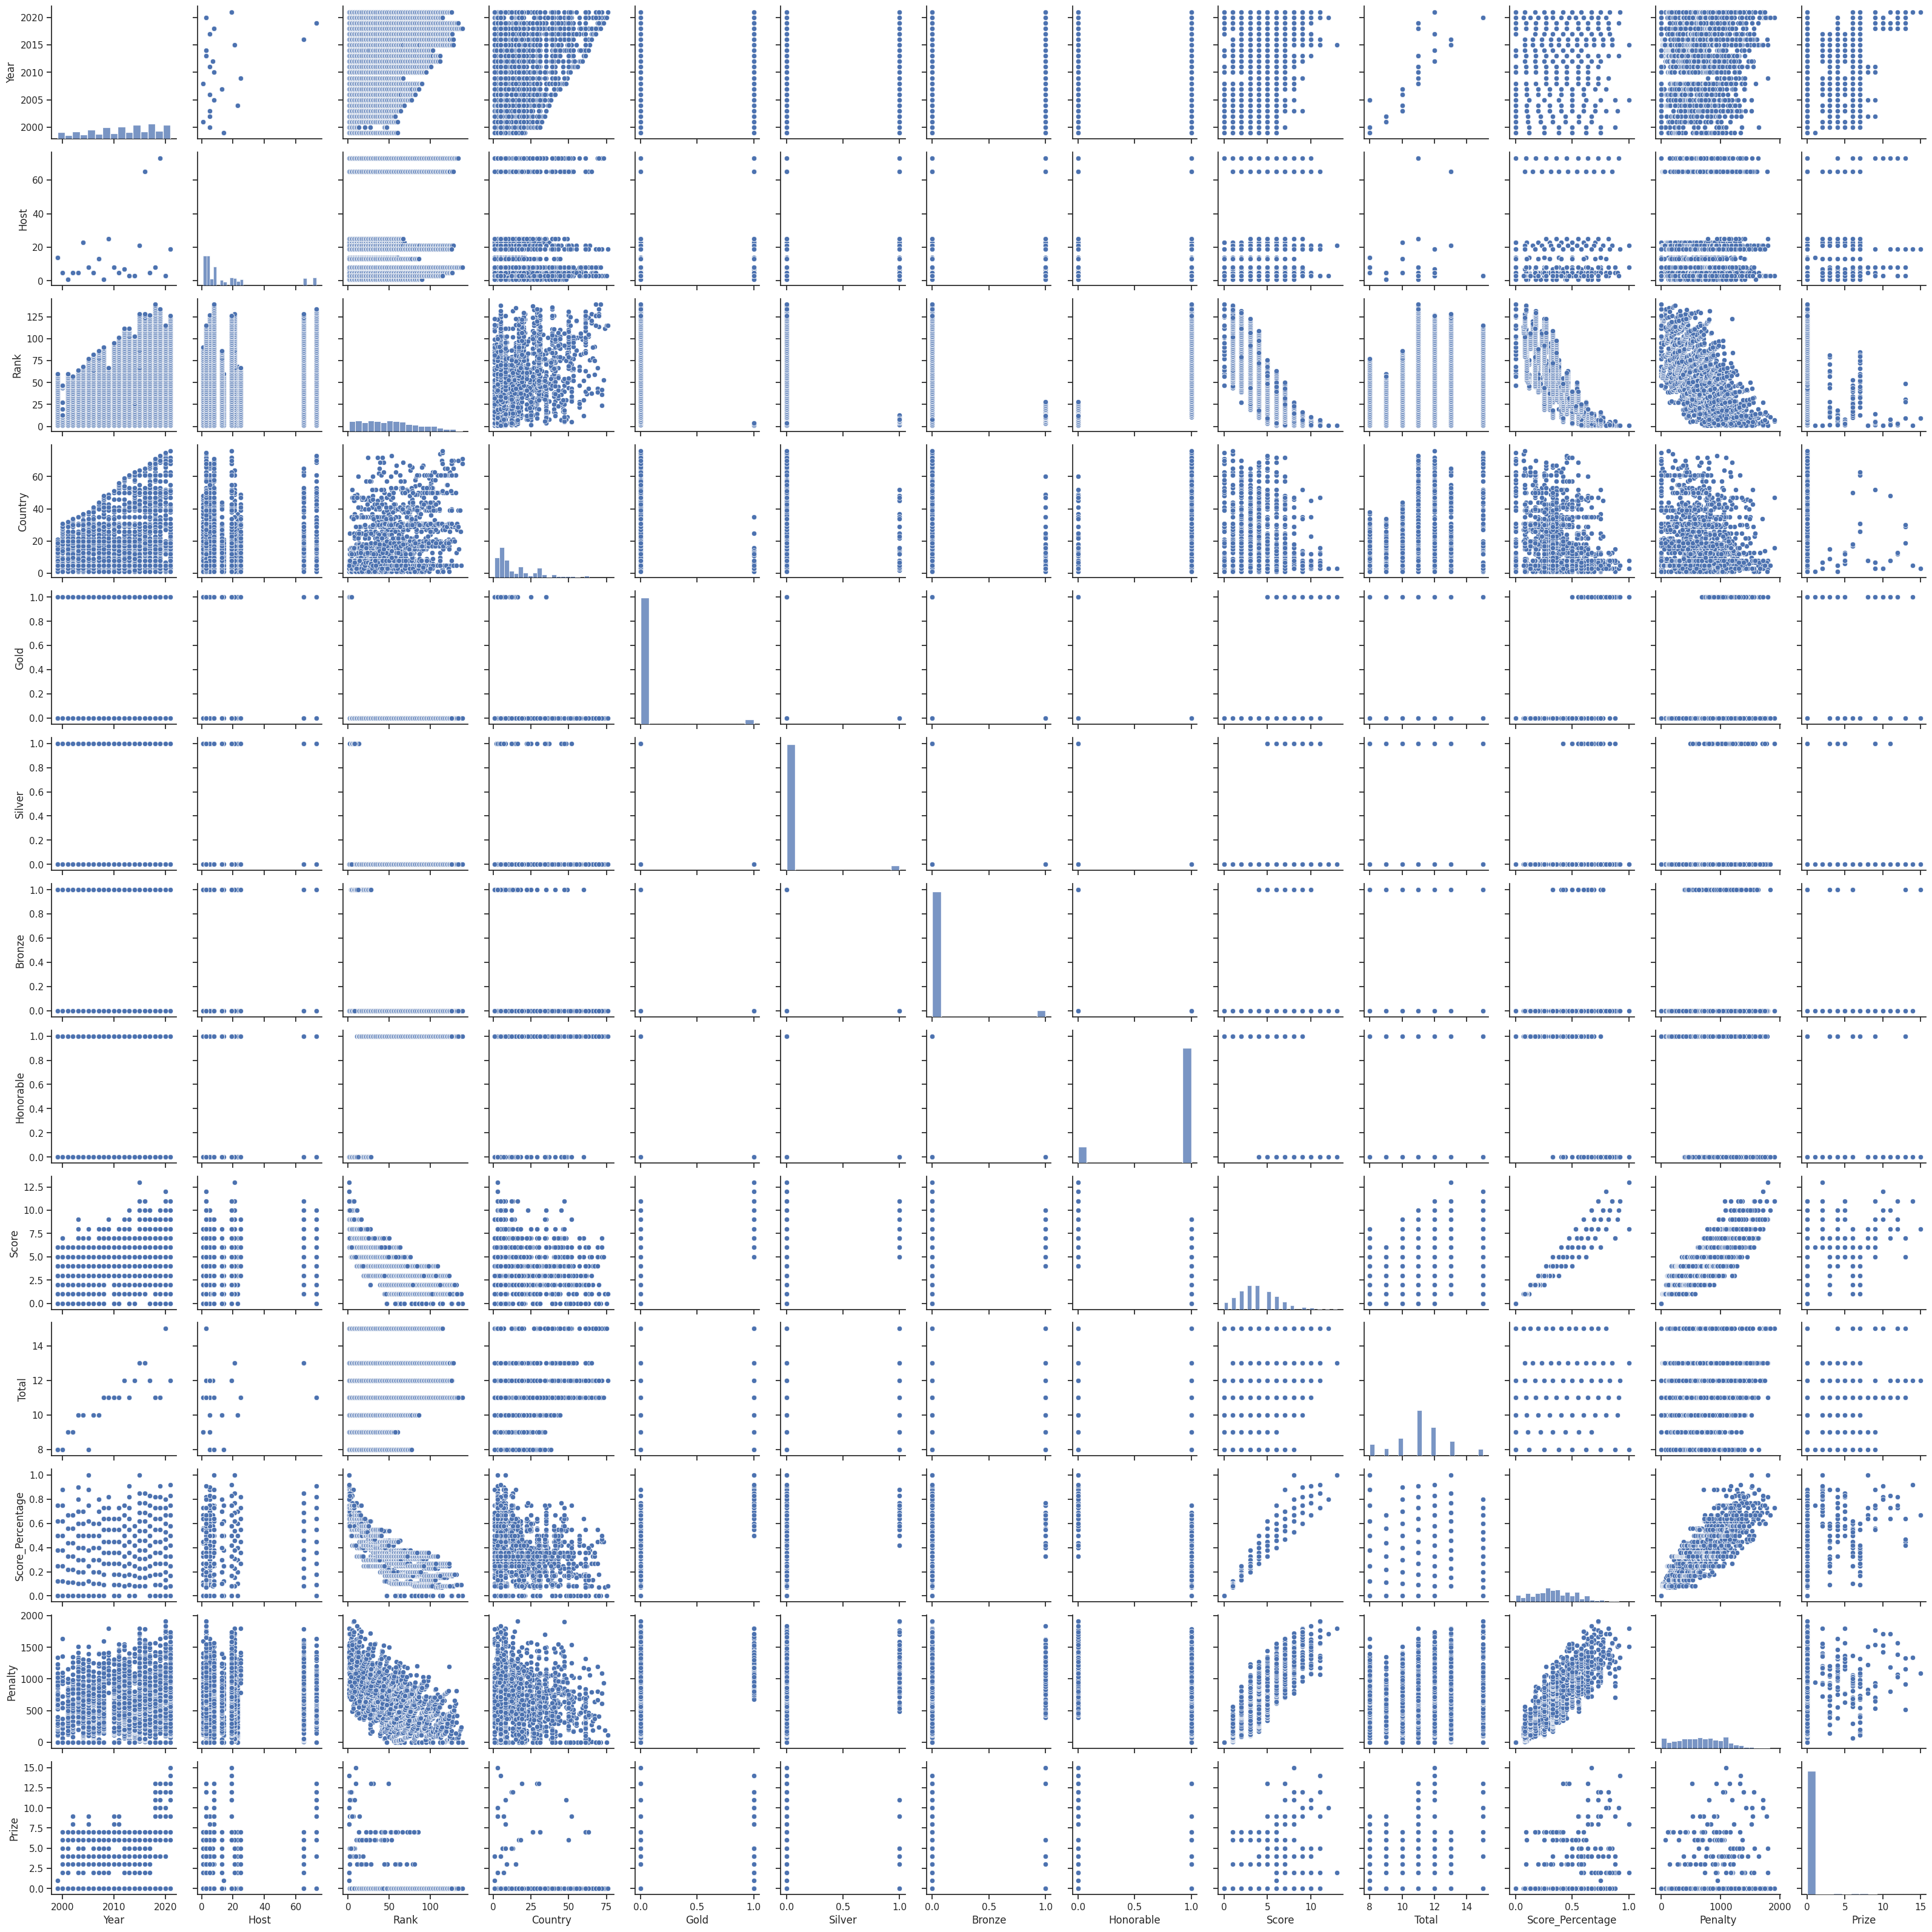

In [ ]:
sns.set(style='ticks')
sns.pairplot(df, vars=['Year', 'Host', 'Rank', 'Country', 'Gold', 'Silver', 'Bronze', 'Honorable', 'Score', 'Total', 'Score_Percentage', 'Penalty', 'Prize'], kind='scatter')
plt.show()

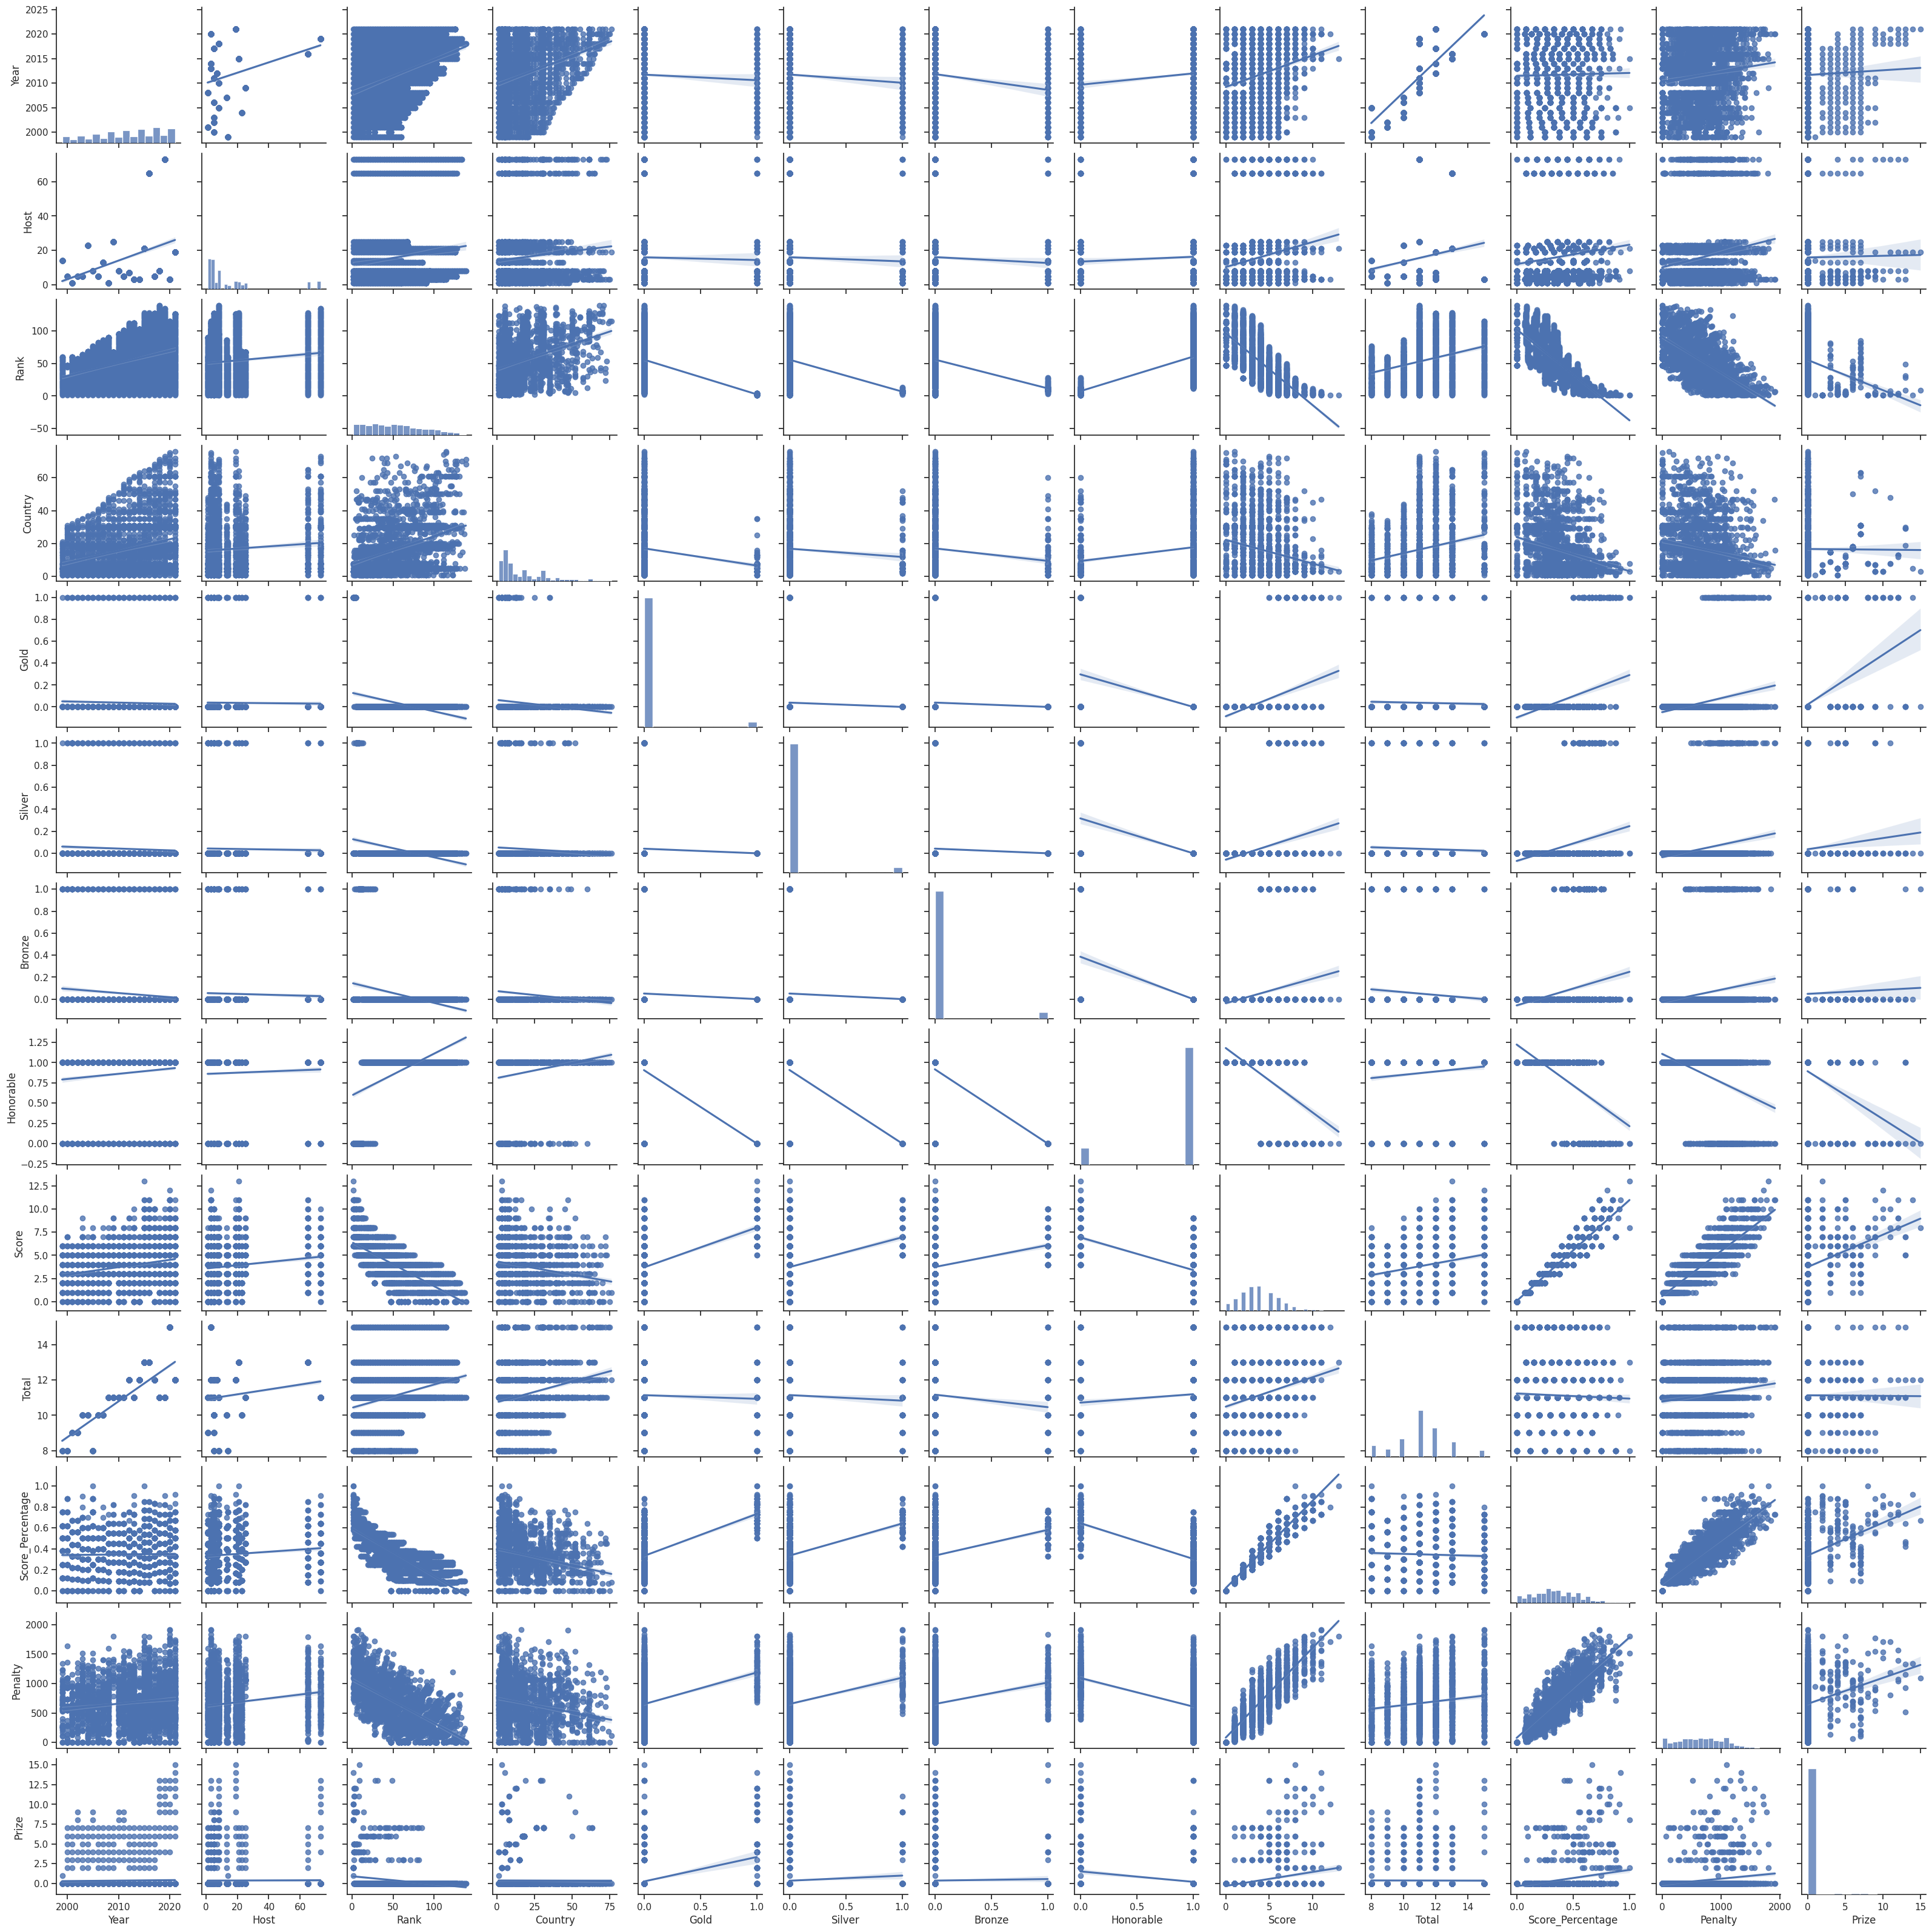

In [ ]:
sns.set(style='ticks')
sns.pairplot(df, vars=['Year', 'Host', 'Rank', 'Country', 'Gold', 'Silver', 'Bronze', 'Honorable', 'Score', 'Total', 'Score_Percentage', 'Penalty', 'Prize'], kind='reg')
plt.show()

## Heatmap

<ipython-input-52-ab84809d8d7a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr() # create a correlation matrix


<Axes: >

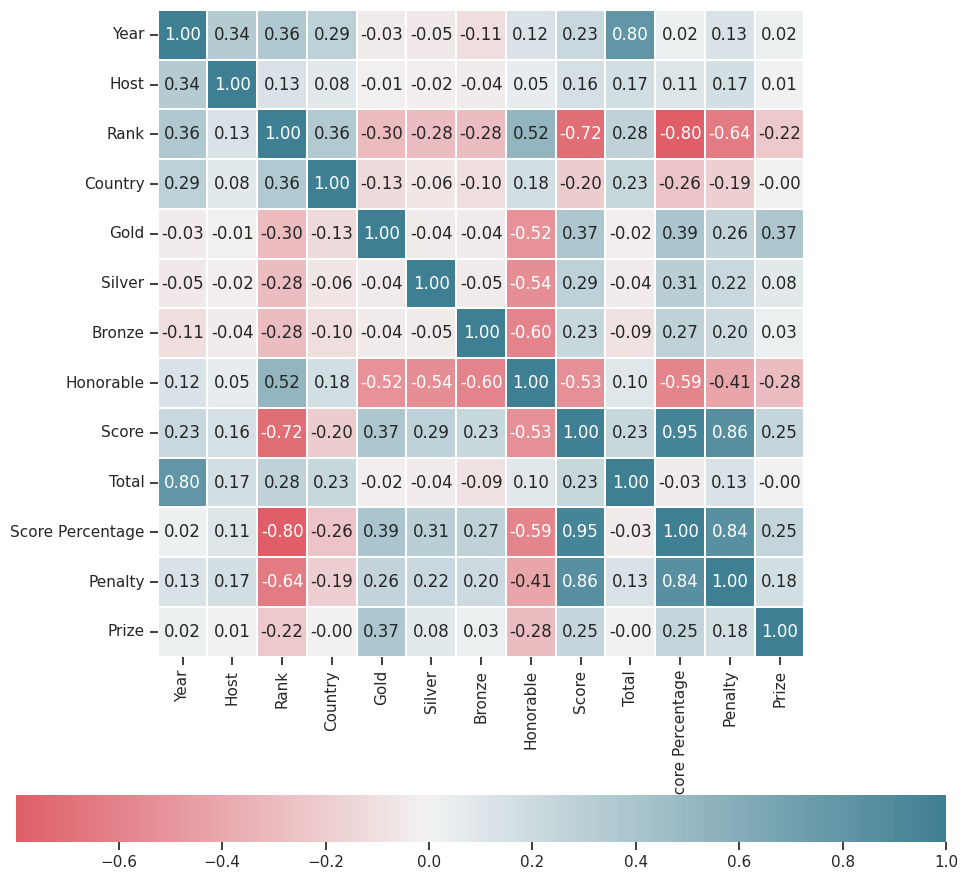

In [ ]:
corr_matrix = data.corr() # create a correlation matrix
plt.figure(figsize=(12, 12))
cmap = sns.diverging_palette(10, 220, as_cmap=True) # define a custom diverging color palette with red for negative values and blue for positive values
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.1, linecolor='white', fmt='.2f', center=0, square=True, cbar=True, cbar_kws={'orientation': 'horizontal'}) # create a heatmap with colorbar and annotations

# Feature Selection

In [ ]:
# Separate the features and target variable (## Rank Gold Silver Honorable Score Score_Percentage Penalty)
y = df['Prize']
X = df.drop(['Year', 'Date', 'Host', 'City', 'Venue', 'University', 'Country', 'Team', 'Contestant 1', 'Contestant 2', 'Contestant 3', 'Bronze', 'Total', 'Prize'], axis=1)

# Dataset Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% Training and 20% Testing
# Preprocess the data by scaling the features
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

NameError: ignored

# Model Training

### Naive Bayes

In [ ]:
# Train a Multinomial Naive Bayes classifier on the training set
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier on the test set
Naive_Bayes_Accuracy = clf.score(X_test, y_test)
print("Naive Bayes Accuracy:", Naive_Bayes_Accuracy*100,"%")

Naive Bayes Accuracy: 63.20346320346321 %


### Knn

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model with training data
knn.fit(X_train, y_train)

# Predicting the class labels for testing data
y_pred = knn.predict(X_test)

# Evaluating the model performance
KNN_Accuracy = knn.score(X_test, y_test)
print("Accuracy:", KNN_Accuracy*100,"%")

Accuracy: 94.58874458874459 %


## Decision Tree

In [ ]:
# Creating the Decision Tree model
dt = DecisionTreeClassifier()

# Fitting the model with training data
dt.fit(X_train, y_train)

# Predicting the class labels for testing data
y_pred = dt.predict(X_test)

# Evaluating the model performance
Decision_Tree_Accuracy = dt.score(X_test, y_test)
print("Accuracy:", Decision_Tree_Accuracy*100, "%")

Accuracy: 90.6926406926407 %


### Logistic Regression

In [ ]:
# Creating the Logistic Regression model
lr = LogisticRegression()

# Fitting the model with training data
lr.fit(X_train, y_train)

# Predicting the class labels for testing data
y_pred = lr.predict(X_test)

# Evaluating the model performance
Logistic_Regression_Accuracy = lr.score(X_test, y_test)
print("Accuracy:", Logistic_Regression_Accuracy*100, "%")

Accuracy: 94.8051948051948 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [ ]:
# Creating the SVM model
svm = SVC()

# Fitting the model with training data
svm.fit(X_train, y_train)

# Predicting the class labels for testing data
y_pred = svm.predict(X_test)

# Evaluating the model performance
SVM_Accuracy = svm.score(X_test, y_test)
print("Accuracy:", SVM_Accuracy*100, "%")

Accuracy: 94.8051948051948 %
